<a href="https://colab.research.google.com/github/LucaNoto/PF_CoderHouse/blob/main/Analise_ausentes_%26_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mortes ocorridas em São Paulo em 2019 à 2022

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
import folium
from folium import plugins


from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter


In [3]:
df=pd.read_csv('data/compiledData/dfMortesCompilado_SemFiltroData.csv')
df.head()

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,NUM_VITIMA,ID_DELEGACIA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,...,COR_PELE,PROFISSAO,NATUREZA_APURADA,CRIME,DESDOBRAMENTO,DESCR_PERIODO,FLAG_VITIMA_FATAL,CONDUTA,COORPORACAO,SITUACAO
0,DECAP,1ª SEC,São Paulo,002 DP - Bom Retiro,1.0,10102,2017-01-21 00:00:00,440,2017,S.PAULO,...,Parda,NaN,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
1,DECAP,1ª SEC,São Paulo,012 DP - Pari,1.0,10108,2017-01-24 00:00:00,489,2017,S.PAULO,...,Preta,NaN,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
2,DECAP,2ª SEC,São Paulo,035 DP - Jabaquara,1.0,10216,2017-01-15 00:00:00,470,2017,S.PAULO,...,Parda,DESEMPREGADO,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
3,DECAP,3ª SEC,São Paulo,034 DP - Vila Sonia,1.0,10356,2017-01-01 00:00:00,2,2017,S.PAULO,...,Parda,SEM PROFISSAO DEFINIDA,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN
4,DECAP,3ª SEC,São Paulo,046 DP - Perus,1.0,10333,2017-01-01 00:00:00,5,2017,S.PAULO,...,Preta,CONFERENTE,HOMICÍDIO DOLOSO,Homicídio Doloso,NaN,NaN,NaN,NaN,NaN,NaN


## Quais são as nossas variáveis?

In [4]:
print("os nomes das variáveis :\n", list(df.columns))

os nomes das variáveis :
 ['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO', 'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO', 'NUM_VITIMA', 'ID_DELEGACIA', 'DATAHORA_REGISTRO_BO', 'NUM_BO', 'ANO_BO', 'MUNICIPIO_ELABORACAO', 'DP_ELABORACAO', 'SEC_ELABORACAO', 'DEP_ELABORACAO', 'DATA_FATO', 'HORA_FATO', 'DESC_TIPOLOCAL', 'LOGRADOURO', 'NUMERO_LOGRADOURO', 'LATITUDE', 'LONGITUDE', 'TIPO_PESSOA', 'SEXO_PESSOA', 'IDADE_PESSOA', 'DATA_NASCIMENTO_PESSOA', 'COR_PELE', 'PROFISSAO', 'NATUREZA_APURADA', 'CRIME', 'DESDOBRAMENTO', 'DESCR_PERIODO', 'FLAG_VITIMA_FATAL', 'CONDUTA', 'COORPORACAO', 'SITUACAO']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7416 entries, 0 to 7415
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DEPARTAMENTO_CIRCUNSCRICAO  7416 non-null   object 
 1   SECCIONAL_CIRCUNSCRICAO     7416 non-null   object 
 2   MUNICIPIO_CIRCUNSCRICAO     7416 non-null   object 
 3   DP_CIRCUNSCRICAO            7416 non-null   object 
 4   NUM_VITIMA                  4151 non-null   float64
 5   ID_DELEGACIA                7416 non-null   object 
 6   DATAHORA_REGISTRO_BO        6929 non-null   object 
 7   NUM_BO                      7416 non-null   object 
 8   ANO_BO                      7416 non-null   object 
 9   MUNICIPIO_ELABORACAO        7416 non-null   object 
 10  DP_ELABORACAO               7416 non-null   object 
 11  SEC_ELABORACAO              7416 non-null   object 
 12  DEP_ELABORACAO              7416 non-null   object 
 13  DATA_FATO                   7416 

## Lidando com valores ausentes

In [6]:
# Quais são os valores totais ausentes no conjunto de dados ?
print("A base de dados possui: ", df.isna().sum().sum(),'dados ausentes')

A base de dados possui:  41843 dados ausentes


In [7]:
# Vamos contar o número de dados ausentes por coluna
missing_values = list(df.isna().sum())
# valores ausentes é uma lista do número de valores ausentes em cada coluna

cols = list(df.columns)
col_final = []
for i in range(len(cols)):
    if (missing_values[i] == 0):
        cols[i]="Others"
d = dict(zip(cols, missing_values)) # fazendo um dicionário para os valores ausentes

print("Number of Missing Values per feature >>")
missing_vals = pd.DataFrame(d, index=["Missing Values"]) # Fazendo um dataframe personalizado a partir do dict d
missing_vals.head()

Number of Missing Values per feature >>


,Others,NUM_VITIMA,DATAHORA_REGISTRO_BO,HORA_FATO,DESC_TIPOLOCAL,NUMERO_LOGRADOURO,LATITUDE,LONGITUDE,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,DESDOBRAMENTO,DESCR_PERIODO,FLAG_VITIMA_FATAL,CONDUTA,COORPORACAO,SITUACAO
Missing Values,0,3265,487,10,1,1180,1347,1348,680,755,1,1844,4995,7416,4238,5758,4259,4259


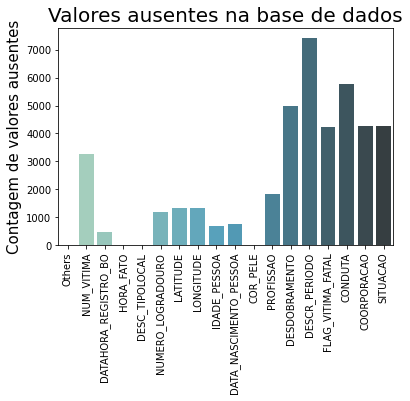

In [8]:
# Plotando os valores ausentes
x = list(d.keys())
y = list(d.values())
sns.barplot(x=x, y=y, palette="GnBu_d")
plt.xticks(rotation=90)
plt.title("Valores ausentes na base de dados", fontdict = {'fontsize': 20})
plt.ylabel("Contagem de valores ausentes", fontdict={'fontsize': 15})
plt.show()

## Por que essa quantidade de valores ausentes ?


Ao analisar a base percebe-se que a maioria das informações que aparece como 'NaN' são sobre a situação da ocorrência. Como os dados são de 2019 à 2022 informações como 'desdobramento','Situação', entre outros.Ainda podem ser preenchidas ao fim do processo.<p>
 A variável 'FLAG_VITIMA_FATAL' só é preenchida quando ocorre flagrante, é um termo jurídico usado para indicar que um criminoso foi pego no momento em que cometia um crime, o que na maioria dos caso não ocorre.
Como neste estudo a gente só quer ver onde foi registrado o crime essas variáveis serão deletadas.<p>

Ainda temos alguns dados relevantes que também estão ausentes, dados como Latitude, Longitude, idade, etc. Como esses recursos não são valores numéricos diretos, não podemos usar funções estatísticas resumidas para preencher os valores ausentes.
Portanto, removeremos esses valores do conjunto de dados.<p>

In [9]:
#tirando as variáveis que possuem muitos valores ausentes
dfClean =df.drop(columns=['NUM_VITIMA','PROFISSAO','DESDOBRAMENTO','DESCR_PERIODO','FLAG_VITIMA_FATAL','CONDUTA','COORPORACAO','SITUACAO'])

In [10]:
dfClean = dfClean.dropna()

In [11]:
dfClean['TIPO_PESSOA'] = dfClean['TIPO_PESSOA'].str.strip().str.upper()

In [12]:
dfClean['TIPO_PESSOA'].value_counts()

VÍTIMA                  2969
AUTOR/VITIMA            1780
ADOLESCENTE              105
ADOLESCENTE INF/VIT       68
INDICIADO                 22
ADOLESCENTE INFRATOR      12
AUTOR                      3
RDO NÃO LOCALIZADO         2
ENCONTRO DE CADÁVER        1
CRIANÇA                    1
Name: TIPO_PESSOA, dtype: int64

In [13]:
dfClean = dfClean[dfClean['TIPO_PESSOA']=='VÍTIMA']

In [14]:
dfClean['DATAHORA_REGISTRO_BO'] = pd.to_datetime(dfClean['DATAHORA_REGISTRO_BO'])
dfClean['DATA_FATO'] = pd.to_datetime(dfClean['DATA_FATO'])
dfClean['HORA_FATO_DT'] = pd.to_datetime(dfClean['HORA_FATO'],errors = 'coerce').dt.strftime('%H')


dfClean['ANO_BO'] = dfClean['ANO_BO'].astype(str)
dfClean['NUM_BO'] = dfClean['NUM_BO'].astype(str)

dfClean['MES_BO'] = dfClean['DATAHORA_REGISTRO_BO'].dt.strftime('%m')
dfClean['DIA_BO'] = dfClean['DATAHORA_REGISTRO_BO'].dt.strftime('%d')
dfClean['HORA_BO'] = dfClean['DATAHORA_REGISTRO_BO'].dt.strftime('%H')
dfClean['DIA_SEMANA_BO'] = dfClean['DATAHORA_REGISTRO_BO'].dt.dayofweek

dfClean['ANO_FATO'] = dfClean['DATA_FATO'].dt.strftime('%Y')
dfClean['MES_FATO'] = dfClean['DATA_FATO'].dt.strftime('%m')
dfClean['DIA_FATO'] = dfClean['DATA_FATO'].dt.strftime('%d')
dfClean['DIA_SEMANA_FATO'] = dfClean['DATA_FATO'].dt.dayofweek


In [15]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2969 entries, 2 to 7413
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   DEPARTAMENTO_CIRCUNSCRICAO  2969 non-null   object        
 1   SECCIONAL_CIRCUNSCRICAO     2969 non-null   object        
 2   MUNICIPIO_CIRCUNSCRICAO     2969 non-null   object        
 3   DP_CIRCUNSCRICAO            2969 non-null   object        
 4   ID_DELEGACIA                2969 non-null   object        
 5   DATAHORA_REGISTRO_BO        2969 non-null   datetime64[ns]
 6   NUM_BO                      2969 non-null   object        
 7   ANO_BO                      2969 non-null   object        
 8   MUNICIPIO_ELABORACAO        2969 non-null   object        
 9   DP_ELABORACAO               2969 non-null   object        
 10  SEC_ELABORACAO              2969 non-null   object        
 11  DEP_ELABORACAO              2969 non-null   object      

In [16]:
# Demora uns 40min pra rodar!!!

dfClean["LAT_LONG"] = dfClean["LATITUDE"].astype(str) + ',' + dfClean['LONGITUDE'].astype(str)

locator = Nominatim(user_agent="myGeocoder", timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.5)

dfClean['RESPONSE_GEOLOCATOR'] = dfClean["LAT_LONG"].apply(rgeocode)

In [24]:
dfClean['GEOLOCATOR_ADDRESS'] = dfClean['RESPONSE_GEOLOCATOR'].apply(lambda loc: loc.raw['address'])
dfClean['GEOLOCATOR_NEIGHBORHOOD'] = dfClean['GEOLOCATOR_ADDRESS'].apply(lambda addr: addr.get('suburb', '-')).str.upper()
dfClean['GEOLOCATOR_POSTCODE'] = dfClean['GEOLOCATOR_ADDRESS'].apply(lambda addr: addr.get('postcode', '-')).str.upper()


mapZonas = {'01':'Centro',
            '02':'Zona Norte',
            '03':'Zona Leste',
            '04':'Zona Sul',
            '05':'Zona Oeste',
            '06':'-',
            '07':'-',
            '08':'Zona Leste',
            '09':'-',
            '38':'-',
            '-':'-'}

dfClean['ZONE_FROM_POSTCODE'] = dfClean['GEOLOCATOR_POSTCODE'].str[:2].map(mapZonas)

In [26]:
dfClean['BO_ANO'] = dfClean[['NUM_BO', 'ANO_BO']].agg('-'.join, axis=1)

In [27]:
dfNumDeVitimas = dfClean['BO_ANO'].value_counts().reset_index().rename(columns={'index':'BO_ANO','BO_ANO':'NUM_VITIMAS_CRIME'})

In [28]:
dfClean = dfClean.merge(dfNumDeVitimas,how='left',on='BO_ANO')

In [29]:
dfClean

,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,ID_DELEGACIA,DATAHORA_REGISTRO_BO,NUM_BO,ANO_BO,MUNICIPIO_ELABORACAO,DP_ELABORACAO,...,DIA_SEMANA_FATO,LAT_LONG,RESPONSE_GEOLOCATOR,GEOLOCATOR_ADDRESS,GEOLOCATOR_NEIGHBORHOOD,GEOLOCATOR_POSTCODE,ZONE_FROM_POSTCODE,BO_ANO,NUM_VITIMAS_CRIME_x,NUM_VITIMAS_CRIME_y
0,DECAP,2ª SEC,São Paulo,035 DP - Jabaquara,10216,2017-01-15,470,2017,S.PAULO,16º D.P. VILA CLEMENTINO,...,6,"-23.6529740306974,-46.6490254237253","(Rua Jupatis, Jabaquara, São Paulo, Região Ime...","{'road': 'Rua Jupatis', 'suburb': 'Jabaquara',...",JABAQUARA,04349-210,Zona Sul,470-2017,1,1
1,DECAP,3ª SEC,São Paulo,046 DP - Perus,10333,2017-01-01,5,2017,S.PAULO,33º D.P. PIRITUBA,...,6,"-23.4265992495567,-46.7528772318428","(Estrada S. Paulo/jundiaí, Estrada São Paulo J...","{'highway': 'Estrada S. Paulo/jundiaí', 'road'...",-,05185-420,Zona Oeste,5-2017,1,1
2,DECAP,3ª SEC,São Paulo,046 DP - Perus,10346,2017-01-05,67,2017,S.PAULO,46º D.P. PERUS,...,3,"-23.4066690729999,-46.767525892","(Rodovia dos Bandeirantes, Perus, São Paulo, R...","{'road': 'Rodovia dos Bandeirantes', 'city_dis...",-,05208-000,Zona Oeste,67-2017,2,2
3,DECAP,3ª SEC,São Paulo,046 DP - Perus,10333,2017-01-31,698,2017,S.PAULO,33º D.P. PIRITUBA,...,1,"-23.414208227,-46.7505133029999","(Rua Recanto Dos Humildes, 1, Rua Recanto dos ...","{'highway': 'Rua Recanto Dos Humildes, 1', 'ro...",-,05204-110,Zona Oeste,698-2017,2,2
4,DECAP,3ª SEC,São Paulo,091 DP - Ceagesp,10357,2017-01-14,238,2017,S.PAULO,91º D.P. CEASA,...,5,"-23.529099244976,-46.7390268652108","(Viaduto Miguel Mofarrej, Vila Leopoldina, São...","{'road': 'Viaduto Miguel Mofarrej', 'suburb': ...",VILA LEOPOLDINA,05314-000,Zona Oeste,238-2017,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964,DECAP,8ª SEC,São Paulo,049 DP - São Mateus,20249,2022-05-02,3278,2022,S.PAULO,49º D.P. SAO MATEUS,...,0,"-23.6175172912222,-46.450838927137","(Avenida Nova Conquista, 4454, Rua Peramirim, ...","{'highway': 'Avenida Nova Conquista, 4454', 'r...",SÃO RAFAEL,03989-010,Zona Leste,3278-2022,1,1
2965,DECAP,3ª SEC,São Paulo,089 DP - Portal do Morumbi,10356,2022-06-28,4146,2022,S.PAULO,89º D.P. JARDIM TABOAO,...,1,"-23.6114818259999,-46.7279471429999","(Avenida Giovanni Gronchi, 3478, Avenida Giova...","{'highway': 'Avenida Giovanni Gronchi, 3478', ...",VILA SÔNIA,05663-020,Zona Oeste,4146-2022,1,1
2966,DECAP,6ª SEC,São Paulo,102 DP - Socorro,10601,2022-07-19,3804,2022,S.PAULO,06ª DDM SANTO AMARO,...,0,"-23.6861267135,-46.709649042","(Rua Doutor Frank Martim, Socorro, São Paulo, ...","{'road': 'Rua Doutor Frank Martim', 'suburb': ...",SOCORRO,04784-060,Zona Sul,3804-2022,1,1
2967,DECAP,8ª SEC,São Paulo,069 DP - Teotônio Vilela,10362,2022-07-14,4490,2022,S.PAULO,69º D.P. TEOTONIO VILELA,...,2,"-23.6020406,-46.4840261","(2300, Rua Margarida Cardoso dos Santos, Vila ...","{'house_number': '2300', 'road': 'Rua Margarid...",SÃO MATEUS,03949-200,Zona Leste,4490-2022,1,1


In [30]:
#Quantos dados foram retidos após essa remoção
print(f'retidos na base: {round(len(dfClean)/len(df)*100,2)}%')

retidos na base: 40.04%


In [31]:
dfClean.to_csv('data/compiledData/dfCleanMortes_SemFiltroData2.csv',index=False)

## Número de crimes distintos na cidade de São Paulo

In [32]:
tiposCrimes = dfClean['CRIME'].unique()
print("Tipos de crimes distintos na cidade de São Paulo:", len(tiposCrimes))
print()
print("Os Crimes são:\n", tiposCrimes)

Tipos de crimes distintos na cidade de São Paulo: 5

Os Crimes são:
 ['Homicídio Doloso' 'Morte Decorrente de Intervenção Policial'
 'Latrocínio' 'Lesão Corporal Seguida de Morte' 'Feminicidio']


In [33]:
start_lat_lon=[-23.58633467412642, -46.60418260319519]

coordenadas=[]
for lat,long in zip(dfClean.LATITUDE,dfClean.LONGITUDE):
  try:
    lat_float = float(lat)
    long_float = float(long)
    coordenadas.append([lat_float,long_float])
  except:
    pass

sp=folium.Map(location=[start_lat_lon[0],start_lat_lon[1]],zoom_start=10,tiles='cartodbpositron')
sp.add_child(plugins.HeatMap(coordenadas))
sp

In [9]:
crimedata2 = pd.DataFrame(df["CRIME"].value_counts().astype(int))
crimedata2.to_json("crimeagg.json")
crimedata2 = crimedata2.reset_index()
crimedata2.columns = ["District", "Number"]

In [37]:
dfClean.ZONE_FROM_POSTCODE.value_counts()

Zona Leste    953
Zona Sul      618
Zona Oeste    570
Zona Norte    539
Centro        173
-             116
Name: ZONE_FROM_POSTCODE, dtype: int64